In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [3]:
df = pd.read_csv("USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.index = df.iloc[:,0]

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [6]:
df = df.iloc[:,1:5]

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
df.index.name = None

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


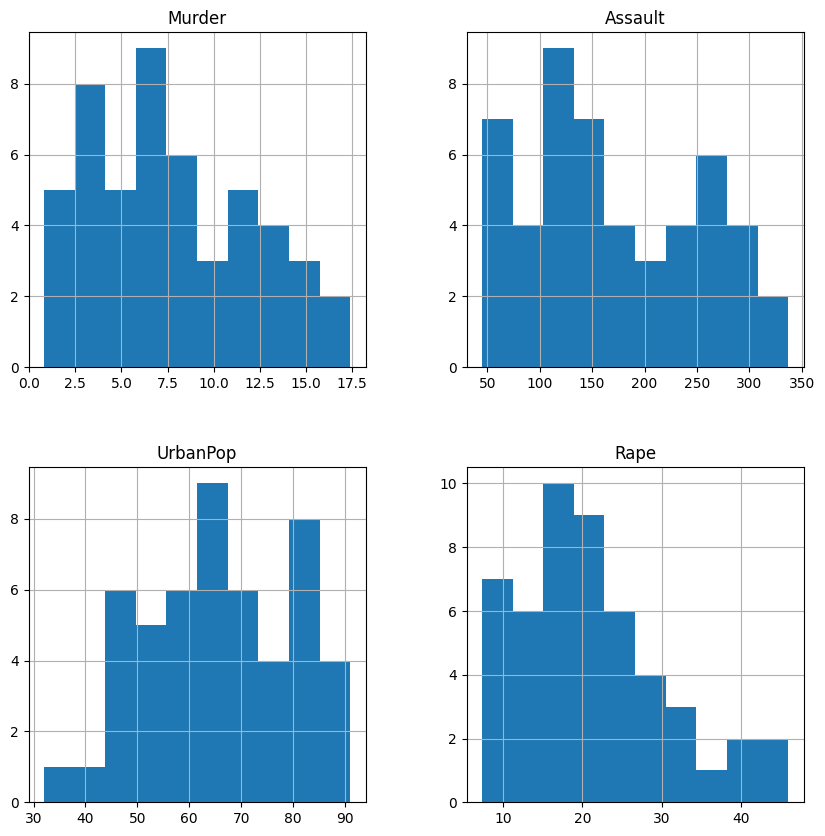

In [13]:
df.hist(figsize=(10, 10));

# K-MEANS Model ve Görselleştirme

In [14]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [15]:
k_fit = kmeans.fit(df)

In [16]:
k_fit.n_clusters

4

In [17]:
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [18]:
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [19]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [20]:
kumeler = k_fit.labels_

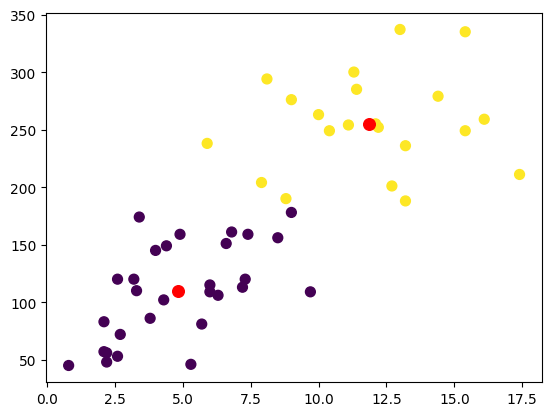

In [21]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s = 50, cmap = "viridis");
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 70, alpha = 1);

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [23]:
#!pip install --upgrade matplotlib
import mpl_toolkits

In [24]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

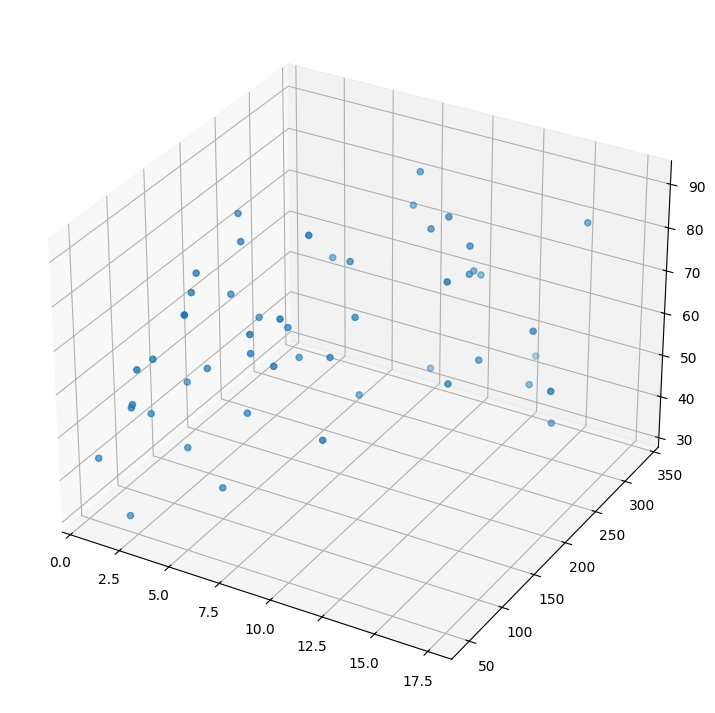

In [25]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

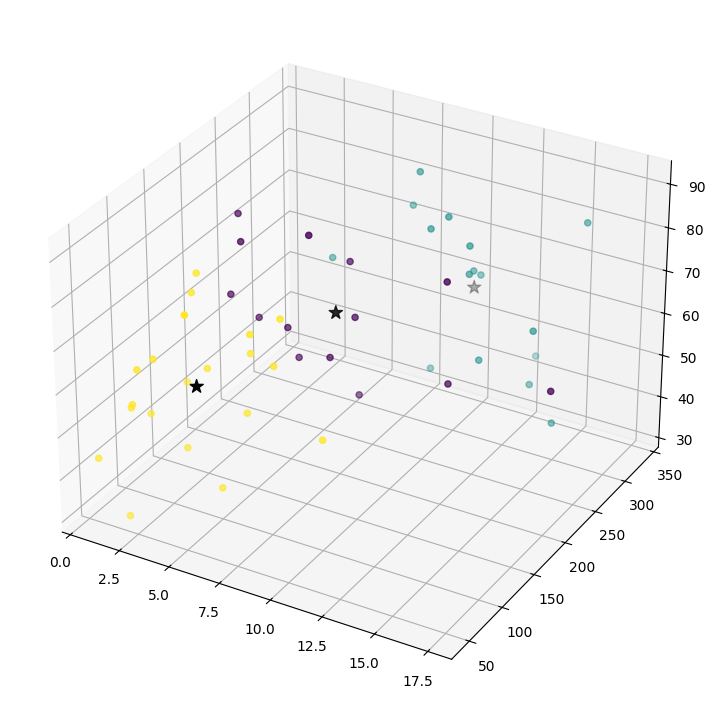

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c = kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], marker= '*', c = '#050505', s=100)

In [27]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [28]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [29]:
df["kume_no"] = kumeler

In [30]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [31]:
df["kume_no"] = df["kume_no"] + 1

In [32]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


# Optimum Küme Sayısısnın Belirlenmesi

In [33]:
#!pip3 install yellowbrick

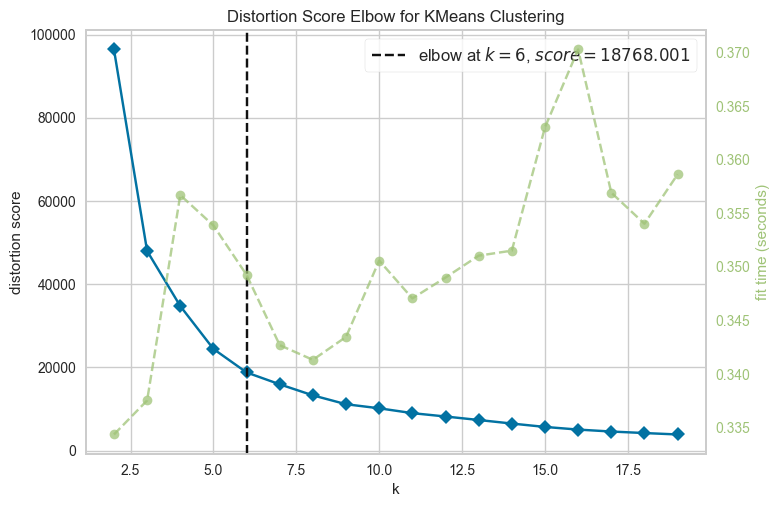

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2, 20))
visualizer.fit(df)
visualizer.poof()

In [38]:
kmeans = KMeans(n_clusters=6)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [39]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,4
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,4
9,Georgia,2


# Hiyerarşik Kümeleme

In [43]:
df = pd.read_csv("USArrests.csv")
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [44]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

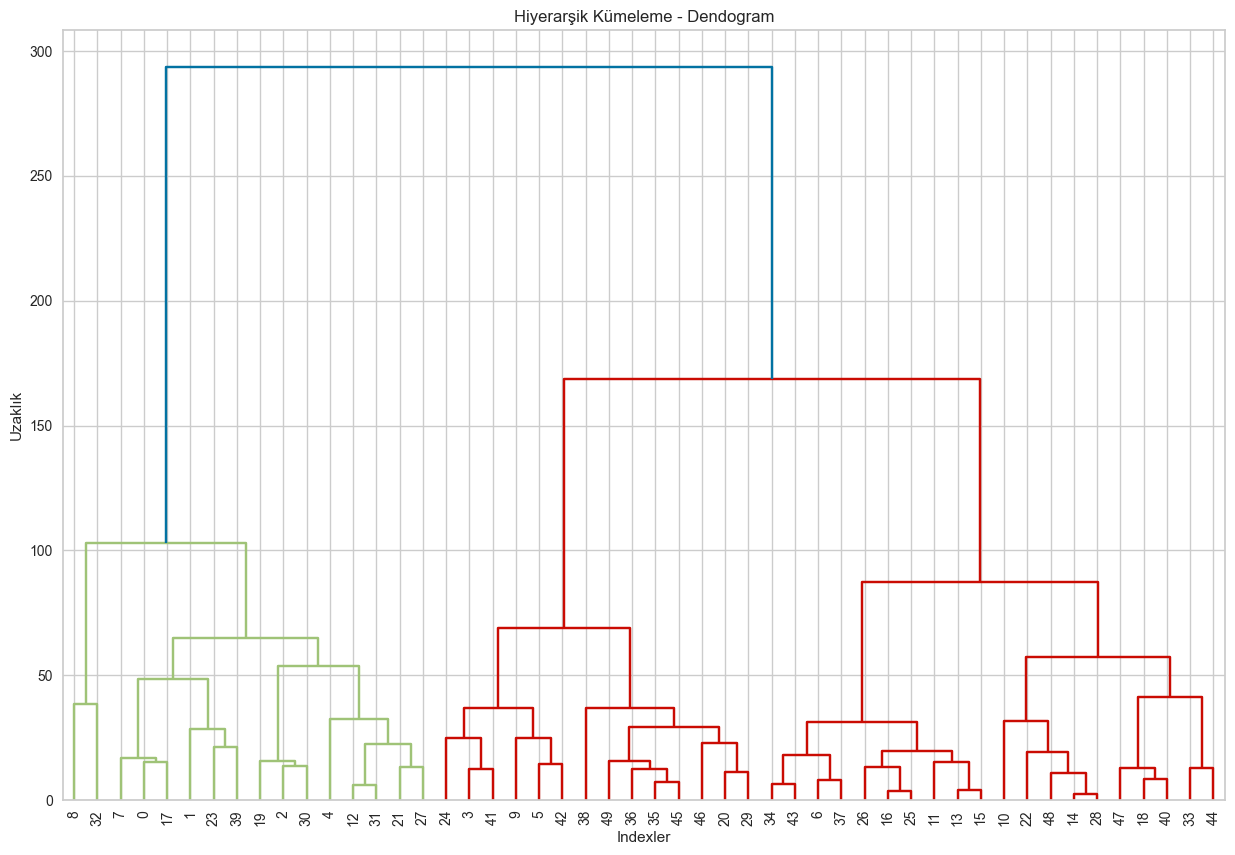

In [46]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
dendrogram(hc_complete, leaf_font_size=10);

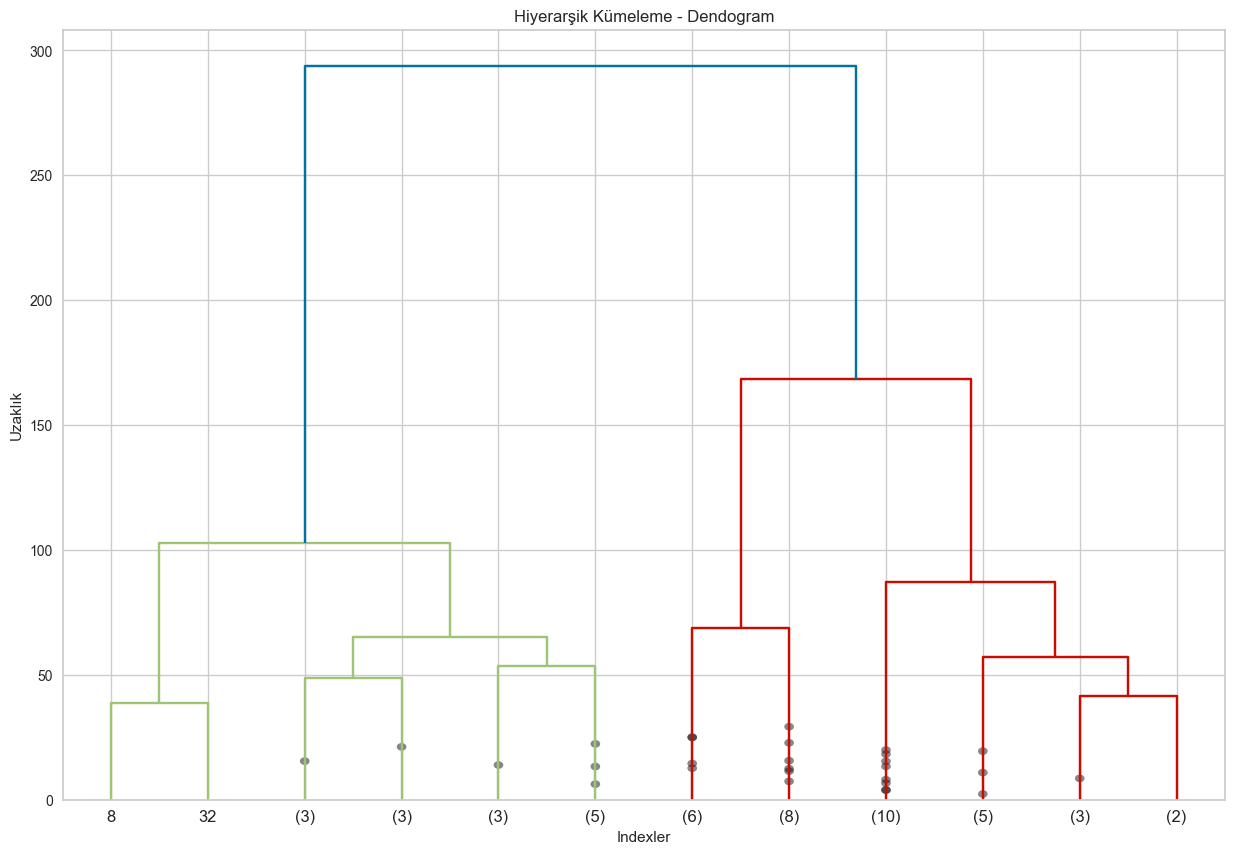

In [53]:
plt.figure(figsize=(15, 10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
dendrogram(hc_complete, truncate_mode="lastp", p=12, show_contracted=True);

## Optimum Küme Sayısı

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 6, 
                                  affinity="euclidean", 
                                  linkage="ward")

cluster.fit_predict(df)

array([1, 1, 0, 5, 0, 5, 3, 1, 0, 5, 4, 3, 1, 3, 4, 3, 3, 1, 4, 0, 2, 1,
       4, 1, 5, 3, 3, 1, 4, 2, 0, 1, 0, 4, 3, 2, 2, 3, 2, 1, 4, 5, 5, 3,
       4, 2, 2, 4, 4, 2], dtype=int64)

# PCA

In [55]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [56]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5, 0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [64]:
bilesen_df = pd.DataFrame(data=pca_fit, columns=["birinci_bilesen","ikinci_bilesen", "ucuncu_bilesen"])

In [65]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [66]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [67]:
pca = PCA().fit(df)

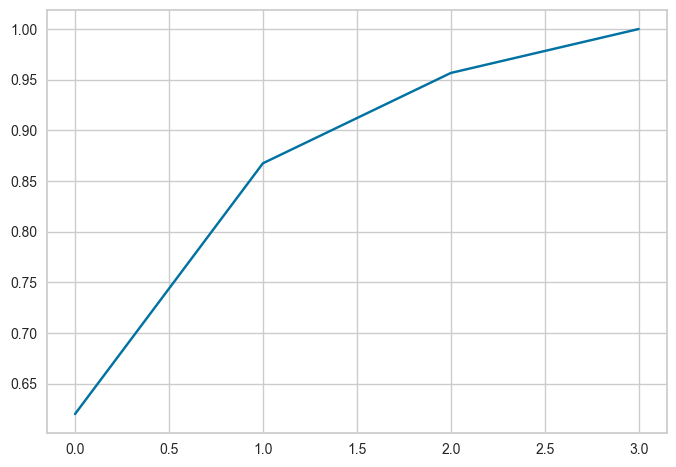

In [69]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));